In [1]:
from utils import *

import pandas as pd
import numpy as np
import category_encoders as ce
from pycaret.classification import *


In [2]:
# Lo unico que hago en este notebook es imputar por simple imputer "public_meeting". Pero probando 
#       varias transformaciones antes y aprendiendo mucho, que de eso se trata

df5 = pd.read_pickle("./pickles_temp/V4_2.pkl")
missing_values_summary(df5)
# Procedo a imputar public_meeting	

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


-------------- PUBLIC_MEETING ---------------
count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object
NaN:    3334
none:   0
ceros:  0
-------------- Head y Tail ---------------
public_meeting
True     51011
False     5055
Name: count, dtype: int64
public_meeting
True     51011
False     5055
Name: count, dtype: int64


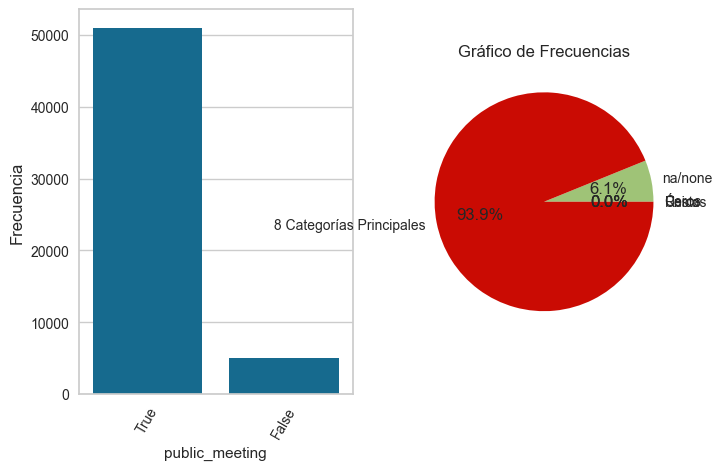

---------------------------------------------


In [3]:
descripcion_categorica(df5, 'public_meeting')

In [4]:
# recupero y modifico las funciones de V4.1
from scipy.stats import chi2_contingency
def cramers_v(var1, var2):
    # Convertir las variables a tipo de datos de categoría si no lo son
    if not pd.api.types.is_categorical_dtype(var1):
        var1 = var1.astype('category')
    if not pd.api.types.is_categorical_dtype(var2):
        var2 = var2.astype('category')
    
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(var1, var2)
    
    # Calcular el coeficiente de contingencia de Cramer
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))
    
    return cramers_v
def v_cramer_dos_col(df, col, target):
    df_filtered = df.loc[(df[col] != np.nan)]
    correlation_col = cramers_v(df_filtered[col], df_filtered[target])
    return (correlation_col)

lista_de_columnas = df5.columns.tolist()
for columna in lista_de_columnas:
    if df5[columna].dtype == 'object':
        print("vCramer con -public_meeting-", columna, round(v_cramer_dos_col(df5, columna, 'public_meeting'), 2))
# observamos una fuerte correlaciñon con  wpt_name, subvillage y ward. Y algo menos con funder e installer. 


vCramer con -public_meeting- funder 0.52
vCramer con -public_meeting- installer 0.53
vCramer con -public_meeting- wpt_name 0.87
vCramer con -public_meeting- basin 0.12
vCramer con -public_meeting- subvillage 0.79
vCramer con -public_meeting- region 0.26
vCramer con -public_meeting- lga 0.52
vCramer con -public_meeting- ward 0.76
vCramer con -public_meeting- public_meeting 1.0
vCramer con -public_meeting- scheme_management 0.27
vCramer con -public_meeting- permit 0.14
vCramer con -public_meeting- extraction_type_class 0.1
vCramer con -public_meeting- management_group 0.25
vCramer con -public_meeting- payment_type 0.14
vCramer con -public_meeting- quality_group 0.06
vCramer con -public_meeting- quantity 0.1
vCramer con -public_meeting- source_type 0.1
vCramer con -public_meeting- source_class 0.06
vCramer con -public_meeting- waterpoint_type 0.09
vCramer con -public_meeting- status_group 0.07


In [5]:
pd.set_option('display.max_columns', None)
df5.head(20)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,2011
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,2013
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional,2013
4,19728,0.0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,True,NaN,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011
5,9944,20.0,Mkinga Distric Coun,1411.5,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,VWC,True,2009.0,submersible,user-group,per bucket,salty,enough,other,NaN,communal standpipe multiple,functional,2011
6,19816,0.0,Dwsp,1943.5,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,VWC,True,NaN,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional,2012
7,54551,0.0,Rwssp,1142.5,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,NaN,True,NaN,handpump,user-group,other/unknown,milky,enough,shallow well,groundwater,hand pump,non functional,2012
8,53934,0.0,Wateraid,1722.5,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,VWC,True,NaN,handpump,user-group,never pay,salty,seasonal,borehole,groundwater,hand pump,non functional,2012
9,46144,0.0,Isingiro Ho,1473.5,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,NaN,True,NaN,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional,2011


In [6]:
# Lo que voy a hacer podría ser más facil usando knn. No obstante quiero graficarlo y hacer un ejercicio de clasificación por simple curiosidad
#   1- Df con id, wpt_name, subvillage y public_meeting .
#   2- convierto a numericas en función de la frecuencia
#   3- grafico por colores azul si es True, rojo si es False. 

df5_public_meeting = df5.copy()
df5_public_meeting = df5_public_meeting[['id', 'wpt_name', 'subvillage', 'public_meeting']]
count_enc = ce.CountEncoder(cols=['wpt_name', 'subvillage'])

# Ajustar y transformar los datos
df5_public_meeting = count_enc.fit_transform(df5_public_meeting)
df5_public_meeting.head(10)

# No veo relación, parece aleatorio... Sigo adelante

,id,wpt_name,subvillage,public_meeting
0,69572,1,6,True
1,8776,830,5,NaN
2,34310,3,502,True
3,67743,1,17,True
4,19728,1748,2,True
5,9944,1,1,True
6,19816,1,3,True
7,54551,4,2,True
8,53934,1,7,True
9,46144,1,1,True


In [7]:
df5_public_meeting.dropna(inplace=True)


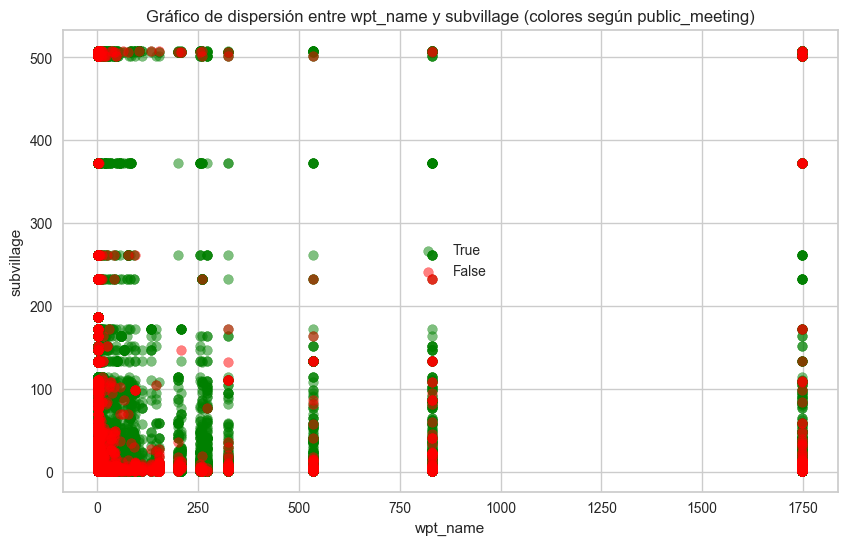

In [8]:
# Colores para True, False y missing respectivamente
colores = {True: 'green', False: 'red'}

# Suponiendo que 'df5_public_meeting' es tu DataFrame
plt.figure(figsize=(10, 6))

# Crear un bucle para trazar puntos según el valor de 'public_meeting'
for value in df5_public_meeting['public_meeting'].unique():
    df_subset = df5_public_meeting[df5_public_meeting['public_meeting'] == value]
    plt.scatter(df_subset['wpt_name'], df_subset['subvillage'], color=colores[value], label=value, alpha=0.5)

plt.title('Gráfico de dispersión entre wpt_name y subvillage (colores según public_meeting)')
plt.xlabel('wpt_name')
plt.ylabel('subvillage')
plt.legend()
plt.show()

# Da la sensaciñon de que los verdes (Trues) se alejan del las esquinas

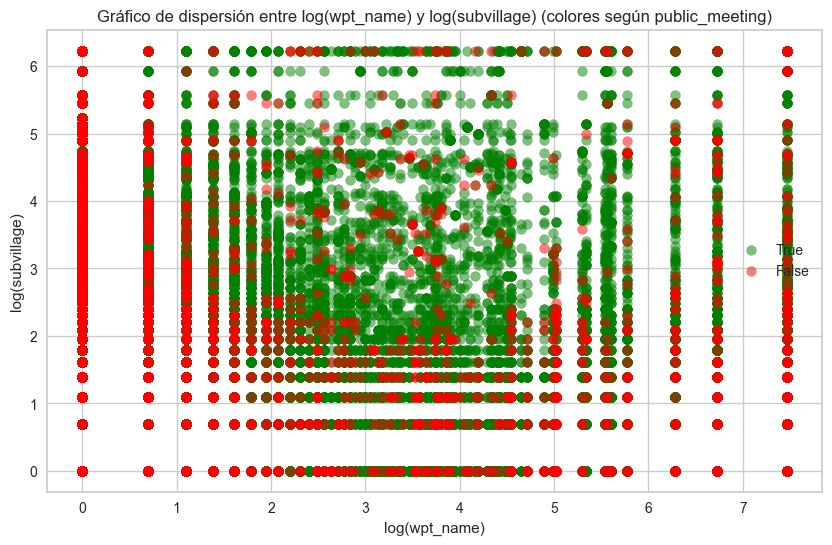

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Colores para True y False respectivamente
colores = {True: 'green', False: 'red'}

# Crear un nuevo DataFrame con el logaritmo de las columnas
df5_public_meeting_log = df5_public_meeting.copy()
df5_public_meeting_log['log_wpt_name'] = np.log(df5_public_meeting_log['wpt_name'])
df5_public_meeting_log['log_subvillage'] = np.log(df5_public_meeting_log['subvillage'])

# Graficar utilizando el nuevo DataFrame
plt.figure(figsize=(10, 6))
for value in df5_public_meeting_log['public_meeting'].unique():
    df_subset = df5_public_meeting_log[df5_public_meeting_log['public_meeting'] == value]
    plt.scatter(df_subset['log_wpt_name'], df_subset['log_subvillage'],
                color=colores[value], label=value, alpha=0.5)

plt.title('Gráfico de dispersión entre log(wpt_name) y log(subvillage) (colores según public_meeting)')
plt.xlabel('log(wpt_name)')
plt.ylabel('log(subvillage)')
plt.legend()
plt.show()

# Ahora se ve más claro que los Trues son más comunes cuando ambos ejes tienen varios valores, sobretodo Villages


In [10]:
df5_public_meeting_log

,id,wpt_name,subvillage,public_meeting,log_wpt_name,log_subvillage
0,69572,1,6,True,0.000000,1.791759
2,34310,3,502,True,1.098612,6.218600
3,67743,1,17,True,0.000000,2.833213
4,19728,1748,2,True,7.466228,0.693147
5,9944,1,1,True,0.000000,0.000000
...,...,...,...,...,...,...
59395,60739,1,4,True,0.000000,1.386294
59396,27263,1,14,True,0.000000,2.639057
59397,37057,15,2,True,2.708050,0.693147
59398,31282,1,24,True,0.000000,3.178054


In [11]:
# Hago un modelo que estime cuando serña True o False co pycaret

model_setup = setup(data=df5_public_meeting_log, 
                    target = 'public_meeting', 
                    session_id=1, 
                    )


,Description,Value
0,Session id,1
1,Target,public_meeting
2,Target type,Binary
3,Original data shape,"(56066, 6)"
4,Transformed data shape,"(56066, 6)"
5,Transformed train set shape,"(39246, 6)"
6,Transformed test set shape,"(16820, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9099,0.5222,0.9099,0.8278,0.8669,0.0000,0.0000,0.7940
nb,Naive Bayes,0.9099,0.5163,0.9099,0.8278,0.8669,0.0000,0.0000,0.0220
ridge,Ridge Classifier,0.9099,0.0000,0.9099,0.8278,0.8669,0.0000,0.0000,0.0270
qda,Quadratic Discriminant Analysis,0.9099,0.5199,0.9099,0.8278,0.8669,0.0000,0.0000,0.0290
lda,Linear Discriminant Analysis,0.9099,0.5222,0.9099,0.8278,0.8669,0.0000,0.0000,0.0390
lightgbm,Light Gradient Boosting Machine,0.9099,0.5392,0.9099,0.8738,0.8674,0.0042,0.0307,0.2540
dummy,Dummy Classifier,0.9099,0.5000,0.9099,0.8278,0.8669,0.0000,0.0000,0.0210
ada,Ada Boost Classifier,0.9097,0.5404,0.9097,0.8278,0.8669,-0.0002,-0.0010,0.3230
gbc,Gradient Boosting Classifier,0.9097,0.5455,0.9097,0.8296,0.8669,0.0003,0.0009,0.9090
xgboost,Extreme Gradient Boosting,0.9097,0.5486,0.9097,0.8686,0.8685,0.0151,0.0537,0.1390


In [13]:
# Cargo de nuevo datos para quedarme con un df solo con missings en la variable objetivo
df5_public_meeting_solo_missings = df5.copy()
df5_public_meeting_solo_missings = df5_public_meeting_solo_missings[['id', 'wpt_name', 'subvillage', 'public_meeting']]
count_enc = ce.CountEncoder(cols=['wpt_name', 'subvillage'])
df5_public_meeting_solo_missings = count_enc.fit_transform(df5_public_meeting_solo_missings)

df5_public_meeting_solo_missings = df5_public_meeting_solo_missings[df5_public_meeting_solo_missings.isna().any(axis=1)]

df5_public_meeting_log_solo_missings = df5_public_meeting_solo_missings.copy()
df5_public_meeting_log_solo_missings['log_wpt_name'] = np.log(df5_public_meeting_log_solo_missings['wpt_name'])
df5_public_meeting_log_solo_missings['log_subvillage'] = np.log(df5_public_meeting_log_solo_missings['subvillage'])
df5_public_meeting_log_solo_missings

,id,wpt_name,subvillage,public_meeting,log_wpt_name,log_subvillage
1,8776,830,5,NaN,6.721426,1.609438
18,34169,1,82,NaN,0.000000,4.406719
21,6091,133,1,NaN,4.890349,0.000000
58,24593,1,3,NaN,0.000000,1.098612
73,35715,1,262,NaN,0.000000,5.568345
...,...,...,...,...,...,...
59306,71419,1,1,NaN,0.000000,0.000000
59310,32815,2,1,NaN,0.693147,0.000000
59324,748,1,3,NaN,0.000000,1.098612
59344,6450,1,508,NaN,0.000000,6.230481


In [14]:
df5_public_meeting_log_solo_missings.drop(columns=['public_meeting'], inplace = True)
df5_public_meeting_log_solo_missings

,id,wpt_name,subvillage,log_wpt_name,log_subvillage
1,8776,830,5,6.721426,1.609438
18,34169,1,82,0.000000,4.406719
21,6091,133,1,4.890349,0.000000
58,24593,1,3,0.000000,1.098612
73,35715,1,262,0.000000,5.568345
...,...,...,...,...,...
59306,71419,1,1,0.000000,0.000000
59310,32815,2,1,0.693147,0.000000
59324,748,1,3,0.000000,1.098612
59344,6450,1,508,0.000000,6.230481


In [15]:
df_resultado_public_meeting = predict_model(best_model, data=df5_public_meeting_log_solo_missings)


In [16]:
df_resultado_public_meeting.rename(columns={'prediction_label': 'public_meeting'}, inplace=True)
df_resultado_public_meeting['public_meeting'] = df_resultado_public_meeting['public_meeting'].replace({1: True, 0: False})
df_resultado_public_meeting

,id,wpt_name,subvillage,log_wpt_name,log_subvillage,public_meeting,prediction_score
1,8776,830,5,6.721426,1.609438,True,0.9119
18,34169,1,82,0.000000,4.406719,True,0.9188
21,6091,133,1,4.890349,0.000000,True,0.9093
58,24593,1,3,0.000000,1.098612,True,0.9044
73,35715,1,262,0.000000,5.568345,True,0.9150
...,...,...,...,...,...,...,...
59306,71419,1,1,0.000000,0.000000,True,0.9020
59310,32815,2,1,0.693147,0.000000,True,0.9008
59324,748,1,3,0.000000,1.098612,True,0.9024
59344,6450,1,508,0.000000,6.230482,True,0.9014


-------------- PUBLIC_MEETING ---------------
count     3334
unique       1
top       True
freq      3334
Name: public_meeting, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
public_meeting
True    3334
Name: count, dtype: int64
public_meeting
True    3334
Name: count, dtype: int64


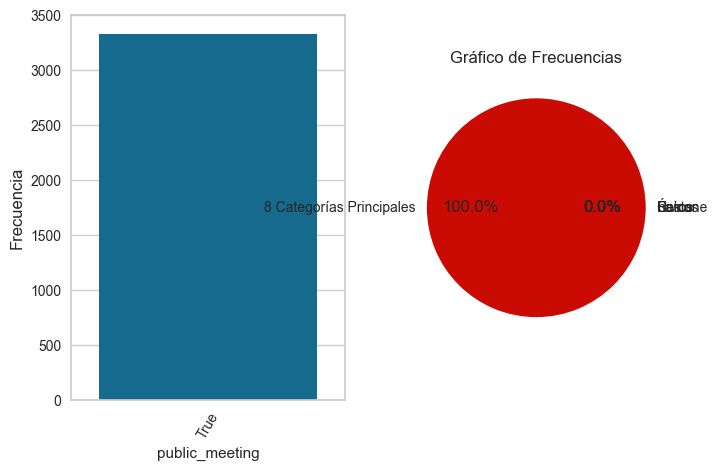

---------------------------------------------


In [17]:
descripcion_categorica(df_resultado_public_meeting, 'public_meeting')
# Y obtenemos un ejemplo perfecto de entrenamiento con desbalanceo. Por eso teníamos un 90% de precisión, porque el 90%
#       de los valores de entrenamiento eran True. Hubiera sido mejor imputarlos aleatoriamente. 
# Vamos a reentrenarlo eliminando registros que sean True hasta que quede balanceado. A priori parece que tenemos suficientes 

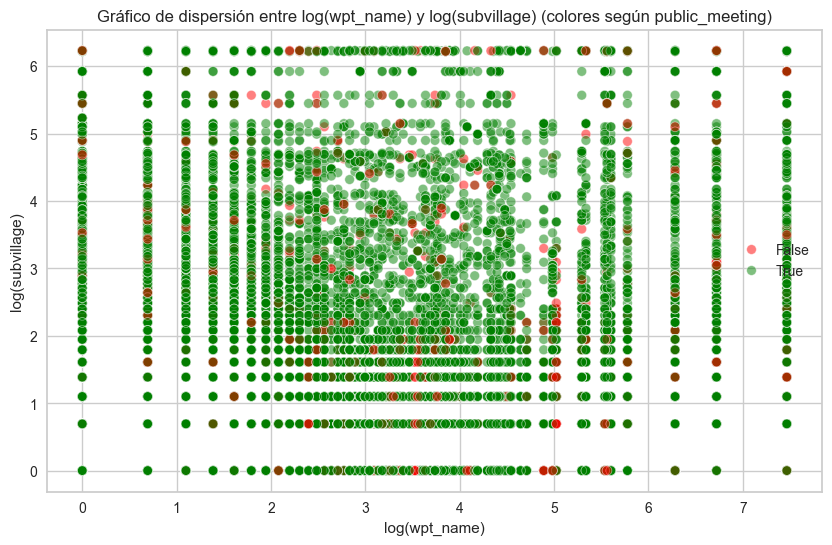

In [18]:
# por cuestionar el gráfico de antes, lo replico, pero con la libreria de seaborn
import seaborn as sns

# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df5_public_meeting_log, x='log_wpt_name', y='log_subvillage', hue='public_meeting', 
                palette=colores, sizes=(10, 200), alpha=0.5)

plt.title('Gráfico de dispersión entre log(wpt_name) y log(subvillage) (colores según public_meeting)')
plt.xlabel('log(wpt_name)')
plt.ylabel('log(subvillage)')
plt.legend()
plt.show()
# Vemos que no se parece en nada y no veo ningún patrón aparente. 
# Me da la sensación que es la forma en la que mathplotlib lo dibuja. Parece que "pinta" los rojos al final (sobre los verdes)

In [19]:
# Recordando que la V de Cramer era de 0.8 con ambas variables, la conclusión a la que llego es que no hay correlación 
#   con la frecuencia con la que se repiten los datos.
# Pruebo a imputar por la media:
# fe_imp.MeanMedianImputer(imputation_method='mean')

df5_imputar_por_mean = df5.copy()
df5_imputar_por_mean = df5_public_meeting[['id', 'wpt_name', 'subvillage', 'public_meeting']]

In [20]:
print(df5['wpt_name'].nunique())
print(df5['subvillage'].nunique())
# Otra opción en vez de imputar todo como aleatorio sería divir en dos poblaciones, trabajando solo con subvillage
#   que tiene más únicas
# Una población de cuya frecuencia de repetición de etiquetas se repita menos de n veces y aplicar etiquetas random
# Y en la otra población hacer un estimador or hot encoding. 
# podemos varíar el número n para que no salgan demasiadas columnas. 

# Lo dejo como posible mejora del proyecto, de momento imputo todo random.


40962
19658


-------------- PUBLIC_MEETING ---------------
count     59400
unique        2
top        True
freq      54057
Name: public_meeting, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
public_meeting
True     54057
False     5343
Name: count, dtype: int64
public_meeting
True     54057
False     5343
Name: count, dtype: int64


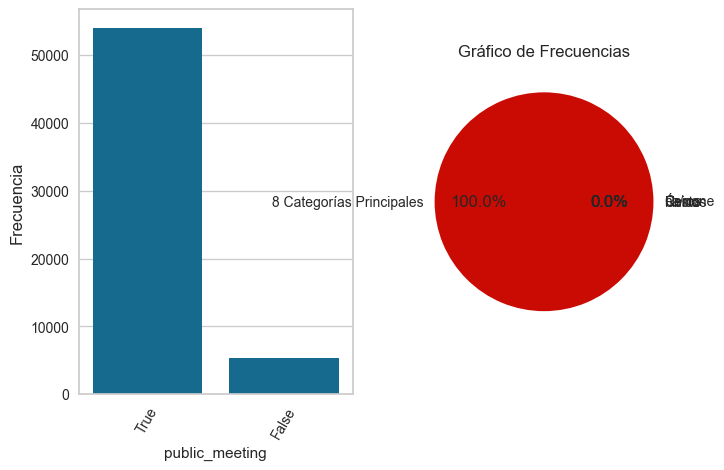

---------------------------------------------


In [21]:
# Importar la clase SimpleImputer
from sklearn.impute import SimpleImputer

""" # Crear una instancia de SimpleImputer con método de imputación 'mean'
mean_imputer = SimpleImputer(strategy='mean')

# Seleccionar las columnas relevantes para la imputación
columns_for_imputation = ['wpt_name', 'subvillage']  # Columnas que se utilizarán para imputar 'public_meeting'

# Imputar valores faltantes en 'public_meeting' utilizando la media de 'wpt_name' y 'subvillage'
df5_imputar_por_mean['public_meeting'] = mean_imputer.fit_transform(df5_imputar_por_mean[columns_for_imputation])
df5_imputar_por_mean

df5_ """

df5_public_meeting = df5.copy()
imputer_aleatorio = fe_imp.RandomSampleImputer()
df5_public_meeting['public_meeting'] = imputer_aleatorio.fit_transform(df5_public_meeting[['public_meeting']])

descripcion_categorica(df5_public_meeting, 'public_meeting')


In [ ]:
# los valores anteriores eran:
#    True     51011
#    False     5055

# Guardo y continuo con los missings
df5_public_meeting.to_pickle("./pickles_temp/V4_3.pkl")
